# Linear Regression

*Startup dataset with 50 records*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# reading the data
df = pd.read_csv('/kaggle/input/50-startups-lr/50_Startups_LR.csv')

### Basic Checks

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


**Inference :**
1. There is a huge difference in the R&D Spend, which means higher range between 0 - 165349.2
2. Marketing Spend also faces similar huge range : from 0 - 471784.10


### Domain Analysis
<ul> 
    <li><b>R&D Spend</b> : Amount spend on Research and development by the startup</li>
    <li><b>Administration</b> : Amount spend for administration purpose</li>
    <li><b>Marketing Spend</b>	: Amount spend for marketing the product of startup</li>
    <li><b>State</b> : The location of startup</li>
    <li><b>Profit</b> : Profit earned by the company</li>
</ul>

### Explonatory Data Analysis

In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Inference :**
No missing data

In [8]:
df.rename(columns={'R&D Spend':'R_and_D','Marketing Spend':'Marketing_Spend'},inplace=True)

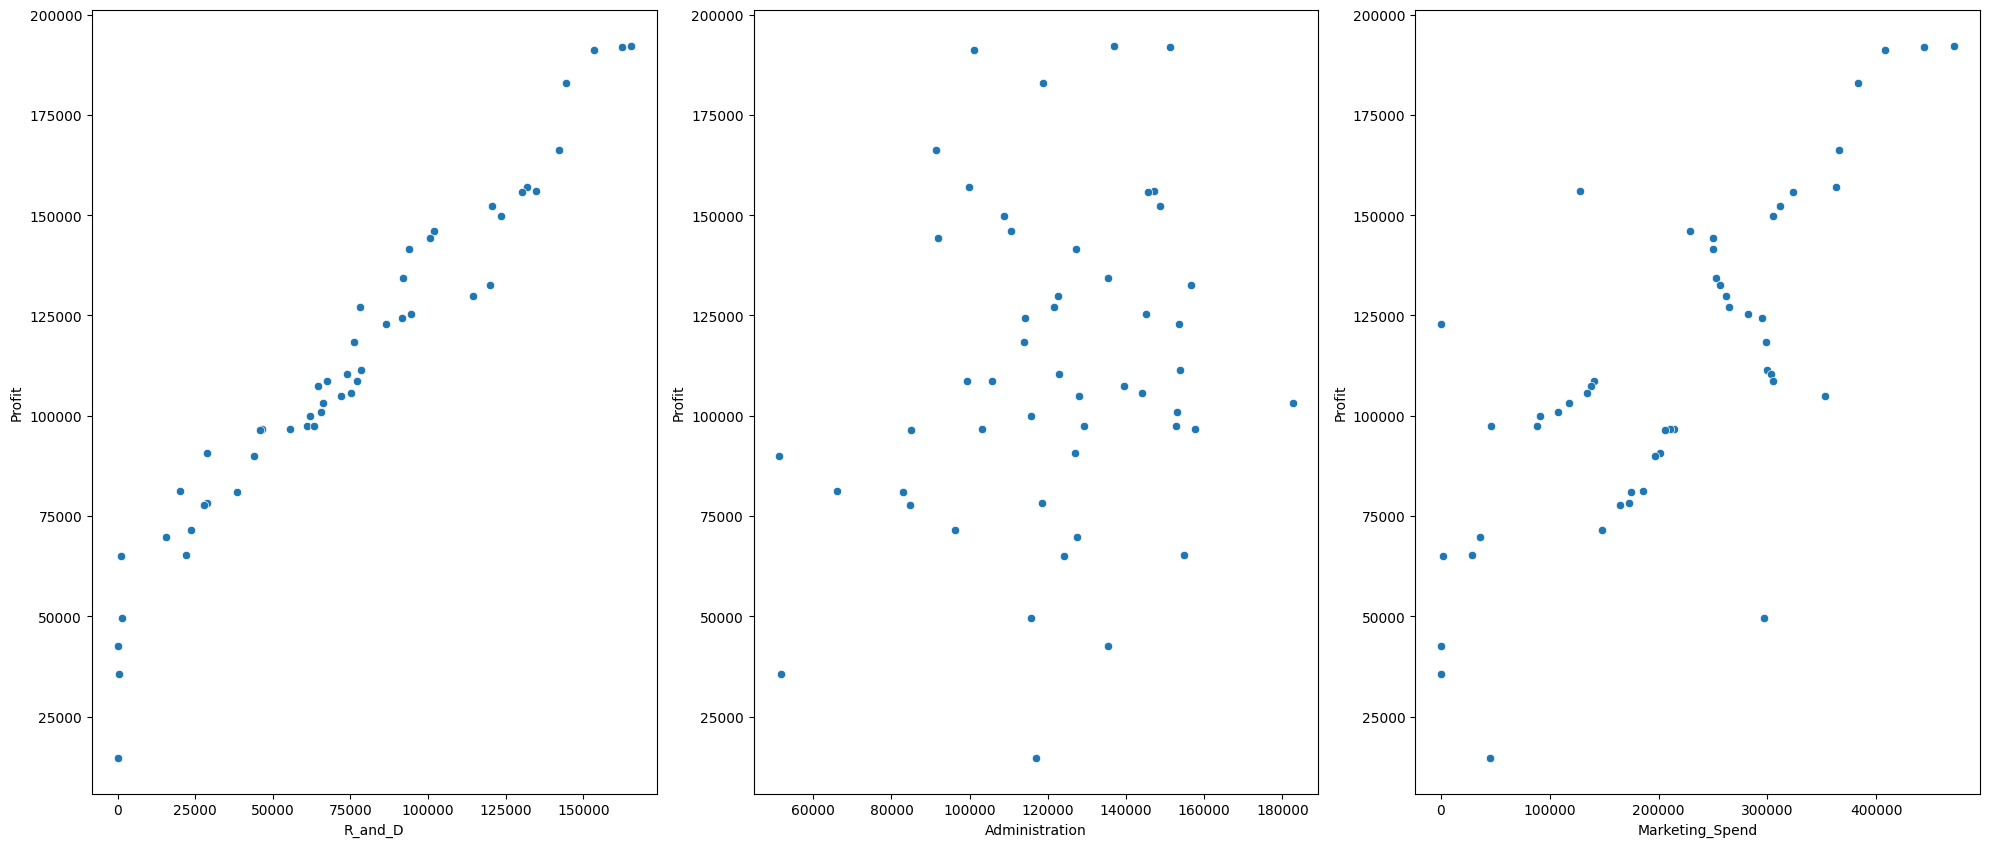

In [9]:
# Bivariant analysis
plt.figure(figsize=(20,25),facecolor='white')
pltnum = 1

for column in df:
    if pltnum <= 4 and column != 'State':
        plt.subplot(3,3,pltnum)
        sns.scatterplot(x=column,y='Profit',data=df)
    pltnum += 1
plt.tight_layout()

**Inference :**
   1. There is a linear relationship between R_and_D and profit (independent and dependant variable)
   2. No strong relationship between Administration and Profit
   3. Slight linear relationship between Marketing_Spend and Profit

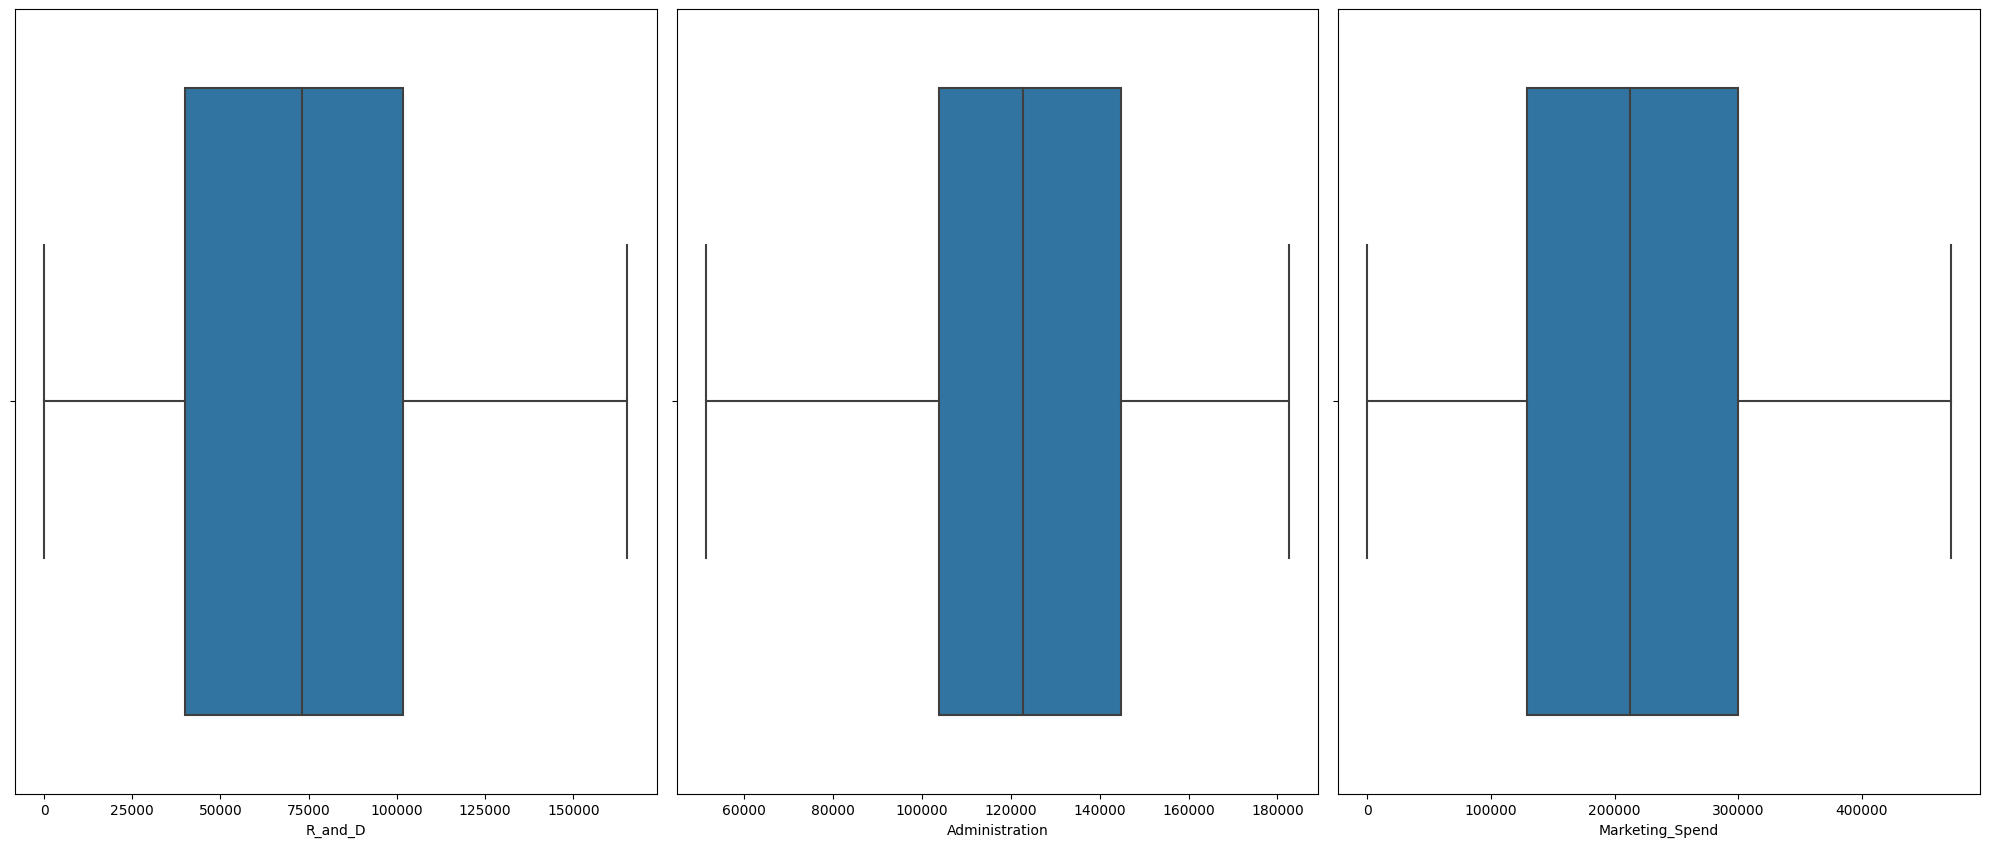

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
pltnum = 1

for column in df:
    if pltnum <= 4 and column != 'State':
        plt.subplot(3,3,pltnum)
        sns.boxplot(x=column,data=df)
    pltnum += 1
plt.tight_layout()

**Inference :**
1. There seems to be no outlier in the continuous features

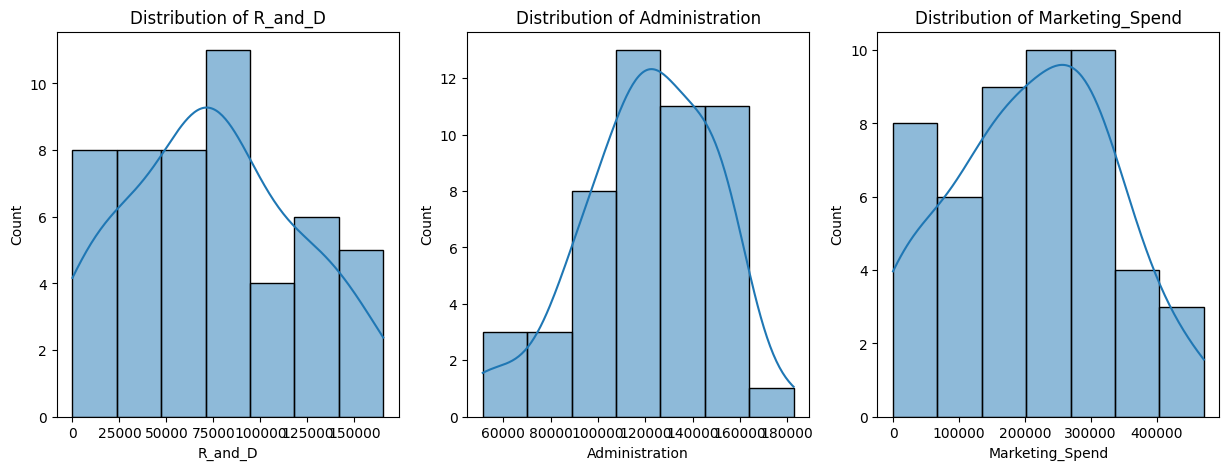

In [11]:
columns_to_plot = ['R_and_D', 'Administration', 'Marketing_Spend']

num_cols = len(columns_to_plot)

fig, axes = plt.subplots(1, num_cols, figsize=(15, 5)) 

# Create displot for each column and display them side by side
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.show()

In [12]:
from scipy import stats

In [13]:
for column in df:
    if column != 'State':
        skewness_val = stats.skew(df[column])
        print('Skewness of {0} : {1}'.format(column,skewness_val)) 

# ['Skewness of {0} : {1}'.format(column,stats.skew(df[column])) for column in df if column!= 'State']

Skewness of R_and_D : 0.15904052321503395
Skewness of Administration : -0.4742300698920047
Skewness of Marketing_Spend : -0.04506631617666136
Skewness of Profit : 0.02258638356958943


**Inference :**
1. Skewness of all the continuous variables are in the correct range

In [14]:
for column in df:
    if column != 'State':
        Kurtosis_val = stats.kurtosis(df[column])
        print('Kurtosis of {0} : {1}'.format(column,Kurtosis_val)) 

# ['Kurtosis of {0} : {1}'.format(column,stats.kurtosis(df[column])) for column in df if column!= 'State']

Kurtosis of R_and_D : -0.8050676431519039
Kurtosis of Administration : 0.08553840791984113
Kurtosis of Marketing_Spend : -0.7240327111087308
Kurtosis of Profit : -0.17529637679752152


**Inference :**
1. Kurtosis values of all the continuous variables indicate that the distribution has lighter tails and a flatter peak than a normal distribution

### Data Preprocessing and feature engineering

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe.fit(df['State'].values.reshape(-1,1))
encoded = ohe.transform(df['State'].values.reshape(-1,1))

df.drop(columns=['State'],axis=1,inplace=True)

df['State'] = encoded.shape[0]
df.head()

,R_and_D,Administration,Marketing_Spend,Profit,State
0,165349.20,136897.80,471784.10,192261.83,50
1,162597.70,151377.59,443898.53,191792.06,50
2,153441.51,101145.55,407934.54,191050.39,50
3,144372.41,118671.85,383199.62,182901.99,50
4,142107.34,91391.77,366168.42,166187.94,50


The state feature is not important so we can drop that feature. Did the encoding for learning purpose.

In [16]:
df.drop(columns=['State'],axis=1,inplace=True)

In [17]:
df.head()

,R_and_D,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


**part of eda - checking multicollinearity using heatmap**

<Axes: >

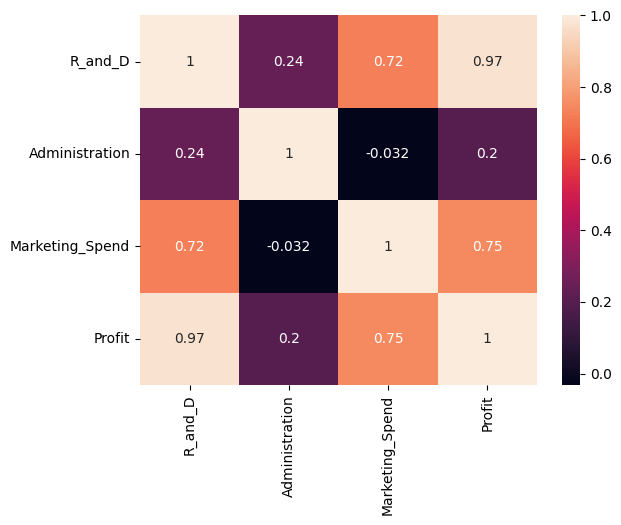

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df.duplicated().sum()

0

**Inference** :
1. R_and_D is highly correlated to profit, but rest of the features doesn't have that strong relationship.
2. Marketing_Spend has the next best correlation and least correlation is between Administration and profit.
3. As we have less features, we would consider all 3 variables.

As the values are in same range scaling is not necessary but can try it for learning purpose.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

df[['R_and_D','Marketing_Spend','Administration','Profit']]=scale.fit_transform(df[['R_and_D','Marketing_Spend',
                                                                                    'Administration','Profit']])

In [21]:
df.head()

,R_and_D,Administration,Marketing_Spend,Profit
0,1.000000,0.651744,1.000000,1.000000
1,0.983359,0.761972,0.940893,0.997355
2,0.927985,0.379579,0.864664,0.993178
3,0.873136,0.512998,0.812235,0.947292
4,0.859438,0.305328,0.776136,0.853171


### Model Creation and Model Evalution

In [22]:
x = df.iloc[:,:-1]
y = df.Profit

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [24]:
print(f'Input Training dataset shape: {x_train.shape}')
print(f'Input Testing dataset shape: {x_test.shape}')

Input Training dataset shape: (40, 3)
Input Testing dataset shape: (10, 3)


In [25]:
print(f'Output Training dataset shape: {y_train.shape}')
print(f'Output Testing dataset shape: {y_test.shape}')

Output Training dataset shape: (40,)
Output Testing dataset shape: (10,)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
LR_model = LinearRegression()

LR_model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predict = LR_model.predict(x_test)
print(f'Predicted Output of test data shape: {y_predict.shape}')

Predicted Output of test data shape: (10,)


In [29]:
y_pre_train = LR_model.predict(x_train)
print(f'Predicted Output of train data shape: {y_pre_train.shape}')

Predicted Output of train data shape: (40,)


#### Model evaluation - using R square, Adjusted R square

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score_predicted = r2_score(y_predict,y_test)
r2_score_pre_train = r2_score(y_pre_train,y_train)

print(f'R2 score of predicted data : {r2_score_predicted}')
print(f'R2 score of training data : {r2_score_pre_train}')

R2 score of predicted data : 0.9910973058448768
R2 score of training data : 0.9342933008391111


In [32]:
print(f'Adjusted R2 score of predicted data : {1-(1-r2_score_predicted)*(10-1)/(10-3-1)}')
print(f'Adjusted R2 score of training data : {1-(1-r2_score_pre_train)*(40-1)/(40-3-1)}')

Adjusted R2 score of predicted data : 0.9866459587673151
Adjusted R2 score of training data : 0.9288177425757037


**Inference :**
1. The R2 score and Adjusted R2 are performance parameters and there is no much difference between them indicating the model is good.
2. There is no overfitting, it is a generalised model as the R2 score of predicted data and trained data is good.

### Cross- validation

In [33]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR_model,X=x_train,y=y_train,cv=3)
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.94187737 0.88204153 0.90597885]
Cross validation Score: 0.9099659181469814
Std : 0.024590027933462186


#### Calculation of cost function (MSE - Mean square error), MAE - Mean absolute error, RMSE - Root mean square error

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
print(f'MSE of predicted data : {mean_squared_error(y_predict,y_test)}')
print(f'MAE of predicted data : {mean_absolute_error(y_predict,y_test)}')
print(f'RMSE of predicted data : {np.sqrt(mean_squared_error(y_predict,y_test))}')


MSE of predicted data : 0.0004748507246916117
MAE of predicted data : 0.014857172822025666
RMSE of predicted data : 0.021791069838161037


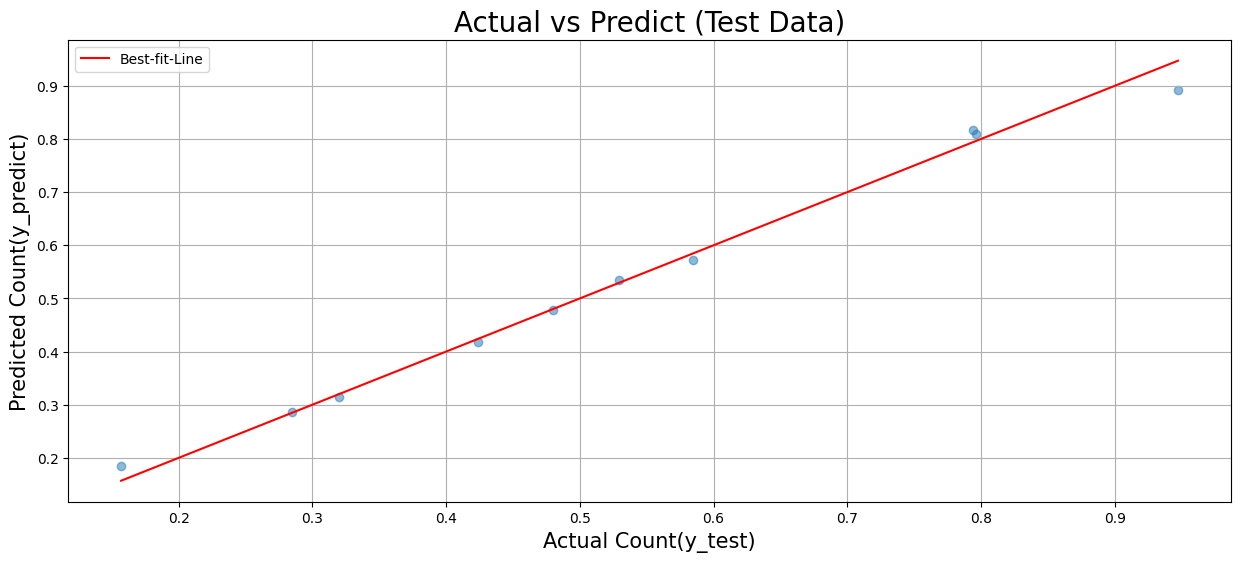

In [36]:
# Scatter plot for test

plt.figure(figsize=(15,6))

plt.scatter(y_test,y_predict,alpha=0.5)
plt.title('Actual vs Predict (Test Data)',fontdict={'size':20})
plt.xlabel('Actual Count(y_test)',fontdict={'size':15})
plt.ylabel('Predicted Count(y_predict)',fontdict={'size':15})
plt.grid(True)

#Adding line for perfect predictions
plt.plot([min(y_test.values),max(y_test.values)],[min(y_test.values),max(y_test.values)],
         color='red',label='Best-fit-Line')
plt.legend()
plt.show()

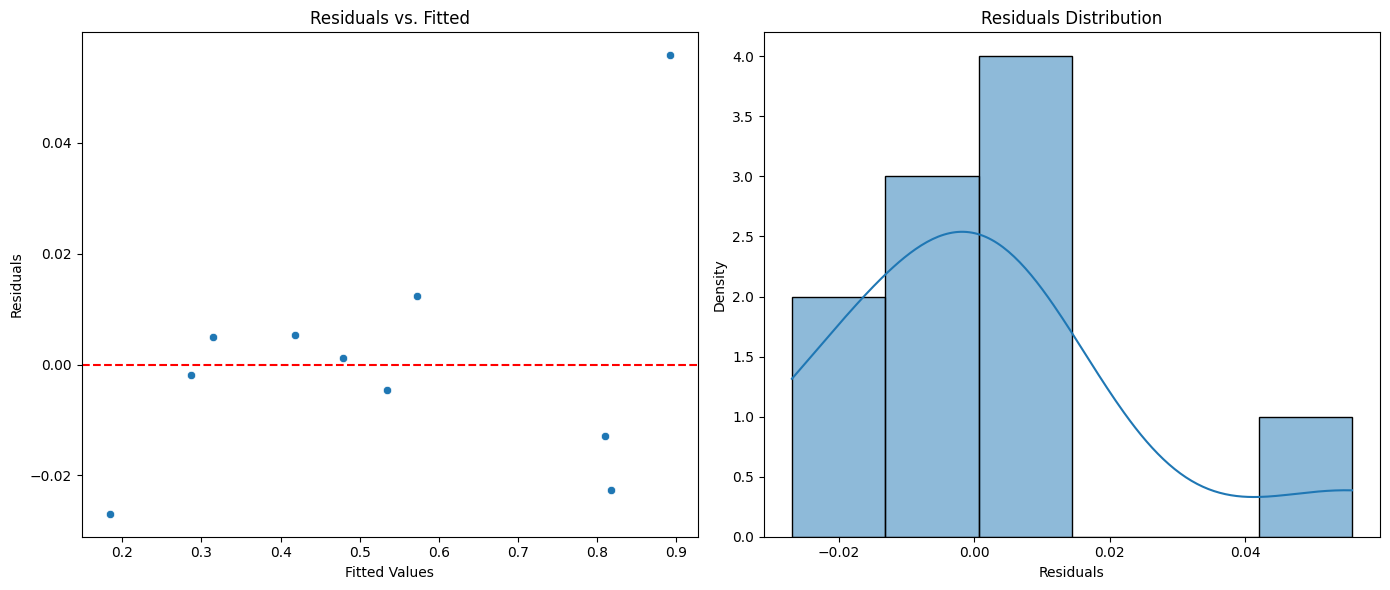

In [37]:

# Calculate residuals
residuals = y_test - y_predict

# Create residual plots
plt.figure(figsize=(14, 6))

# Residuals vs. Fitted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Residuals distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.tight_layout()
plt.show()